In [12]:
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from utils import *

In [13]:
def v_check(idx):
    """ Pass patient eid to see 
    1) left ventricle long axis ED frame
    2) Segmented lv la ED frame
    3) Boxed lv la ED frame
    """
    try:
        print(f"IDX is {idx}")
        image_path = f"E:/UKBB_NIFTI/{idx}/la_4ch_ED.nii.gz"
        seg_image_path = f"E:/UKBB_NIFTI/{idx}/seg4_la_4ch_ED.nii.gz"

        nim = nib.load(image_path)
        image = nim.get_fdata()

        seg_nim = nib.load(seg_image_path)
        seg_image = seg_nim.get_fdata()
        plt.imshow(image.squeeze(), cmap='gray') # I would add interpolation='none'
        plt.show()
        plt.imshow(seg_image.squeeze(), cmap='gray') # I would add interpolation='none'
        plt.show()

        image,masked_image, props=segment_left_ventricle_ED(image_path, seg_image_path, label=1, qc=True)
        image=image.squeeze()
        masked_image=masked_image.squeeze()
        fig, ax = plt.subplots()
        ax.imshow(image, cmap='gray') # I would add interpolation='none'
        data_masked = np.ma.masked_where(masked_image == 0, masked_image)
        ax.imshow(data_masked,interpolation = 'none', vmin=0, alpha=0.8)
        plt.show()
        print()
        print()
    except:
        print('no file')

In [16]:
idx="5611162"
image_path = f"E:/UKBB_NIFTI/{idx}/la_4ch_ED.nii.gz"
seg_image_path = f"E:/UKBB_NIFTI/{idx}/seg4_la_4ch_ED.nii.gz"

nim = nib.load(image_path)
image = nim.get_fdata()

seg_nim = nib.load(seg_image_path)
seg_image = seg_nim.get_fdata()

In [19]:
seg_image=seg_image==1.

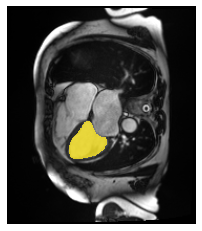

In [25]:
overlap_mask(image.squeeze(),seg_image.squeeze())
plt.axis('off')
plt.savefig("spherical_heart.png")

In [3]:
def exclude_and_save(ids):
    raw_length = pd.read_csv("I:/UKB_DATA/tsv_pheno/raw_length.tsv",sep='\t')
    raw_width = pd.read_csv("I:/UKB_DATA/tsv_pheno/raw_width.tsv",sep='\t')
    a_length = pd.read_csv("I:/UKB_DATA/tsv_pheno/adjusted_lv_length.tsv",sep='\t')
    a_width = pd.read_csv("I:/UKB_DATA/tsv_pheno/adjusted_lv_width.tsv",sep='\t')
    si = pd.read_csv("I:/UKB_DATA/tsv_pheno/sphericity_index.tsv",sep='\t')
    
    raw_length = raw_length[~ raw_length['idx'].isin(ids)]
    raw_width = raw_width[~ raw_width['idx'].isin(ids)]
    a_length = a_length[~ a_length['idx'].isin(ids)]
    a_width = a_width[~ a_width['idx'].isin(ids)]
    si = si[~ si['idx'].isin(ids)]
    
    raw_length = raw_length.loc[:, ~raw_length.columns.str.contains('^Unnamed')]
    raw_width =  raw_width.loc[:, ~raw_width.columns.str.contains('^Unnamed')]
    a_length =  a_length.loc[:, ~a_length.columns.str.contains('^Unnamed')]
    a_width =  a_width.loc[:, ~a_width.columns.str.contains('^Unnamed')]
    si =  si.loc[:, ~si.columns.str.contains('^Unnamed')]

    
    raw_length.to_csv("I:/UKB_DATA/tsv_pheno/raw_length.tsv",sep='\t')
    raw_width.to_csv("I:/UKB_DATA/tsv_pheno/raw_width.tsv",sep='\t')
    a_length.to_csv("I:/UKB_DATA/tsv_pheno/adjusted_lv_length.tsv",sep='\t')
    a_width.to_csv("I:/UKB_DATA/tsv_pheno/adjusted_lv_width.tsv",sep='\t')
    si.to_csv("I:/UKB_DATA/tsv_pheno/sphericity_index.tsv",sep='\t')

In [36]:
exclude_and_save([])

## Plot raw distributions

## CHECK LENGTH VS WIDTH

In [4]:
raw_length = pd.read_csv("I:/UKB_DATA/tsv_pheno/raw_length.tsv",sep='\t')
raw_width = pd.read_csv("I:/UKB_DATA/tsv_pheno/raw_width.tsv",sep='\t')
a_length = pd.read_csv("I:/UKB_DATA/tsv_pheno/adjusted_lv_length.tsv",sep='\t')
a_width = pd.read_csv("I:/UKB_DATA/tsv_pheno/adjusted_lv_width.tsv",sep='\t')
si = pd.read_csv("I:/UKB_DATA/tsv_pheno/sphericity_index.tsv",sep='\t')

In [40]:
si

Unnamed: 0      idx     pheno
0               0  1000158  0.512526
1               1  1000243  0.582123
2               2  1000262  0.642401
3               3  1000369  0.598390
4               4  1000489  0.535714
...           ...      ...       ...
38892       38892  6024127  0.584615
38893       38893  6024225  0.642857
38894       38894  6024290  0.532787
38895       38895  6024624  0.504608
38896       38896  6024797  0.573333

[38897 rows x 3 columns]

In [30]:
raw_length

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0               0             0               0                 0   
1               1             1               1                 1   
2               2             2               2                 2   
3               3             3               3                 3   
4               4             4               4                 4   
...           ...           ...             ...               ...   
38892       38897         38920           38935             38936   
38893       38898         38921           38936             38937   
38894       38899         38922           38937             38938   
38895       38900         38923           38938             38939   
38896       38901         38924           38939             38940   

       Unnamed: 0.1.1.1.1  Unnamed: 0.1.1.1.1.1  Unnamed: 0.1.1.1.1.1.1  \
0                       0                     0                       0   
1                       1                     1                       1   
2                       2                     2                       2   
3                       3                     3                       3   
4                       4                     4                       4   
...                   ...                   ...                     ...   
38892               38938                 38965                   38967   
38893               38939                 38966                   38968   
38894               38940                 38967                   38969   
38895               38941                 38968                   38970   
38896               38942                 38969                   38971   

       Unnamed: 0.1.1.1.1.1.1.1  Unnamed: 0.1.1.1.1.1.1.1.1  \
0                             0                           0   
1                             1                           1   
2                             2                           2   
3                             3                           3   
4                             4                           4   
...                         ...                         ...   
38892                     38971                       38973   
38893                     38972                       38974   
38894                     38973                       38975   
38895                     38974                       38976   
38896                     38975                       38977   

       Unnamed: 0.1.1.1.1.1.1.1.1.1  Unnamed: 0.1.1.1.1.1.1.1.1.1.1  \
0                                 0                               0   
1                                 1                               1   
2                                 2                               2   
3                                 3                               3   
4                                 4                               4   
...                             ...                             ...   
38892                         38988                           38999   
38893                         38989                           39000   
38894                         38990                           39001   
38895                         38991                           39002   
38896                         38992                           39003   

       Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1  Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1  \
0                                     0                                   0   
1                                     1                                   1   
2                                     2                                   2   
3                                     3                                   3   
4                                     4                                   4   
...                                 ...                                 ...   
38892                             39005                               39011   
38893                             3

Text(0, 0.5, 'Raw width')

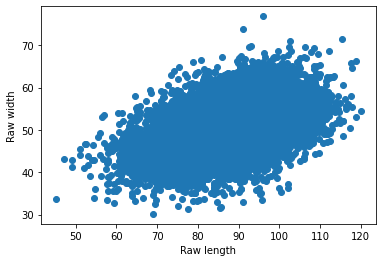

In [5]:
plt.scatter(raw_length['pheno'],raw_width['pheno'])
plt.xlabel("Raw length")
plt.ylabel("Raw width")

Find Ids that are $<30$ length and $<20$ width

Find Ids that are $<40$ length and $<30$ width

In [21]:
df=pd.DataFrame(data={'idx': raw_length['idx'], "raw_length":raw_length['pheno'], "raw_width":raw_width['pheno']})
df=df[df['raw_length']<48]
df=df[df['raw_width']<38]
to_check=df['idx']

## CHECK LENGTH

Text(0, 0.5, 'Raw length')

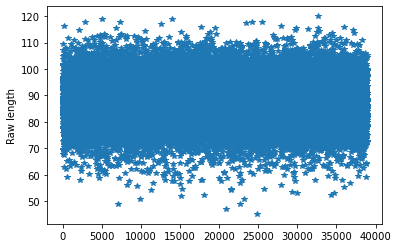

In [16]:
plt.plot(raw_length['pheno'],'*')
plt.ylabel("Raw length")

Find Ids that are < 40 length

In [7]:
to_check=np.array(raw_length[raw_length['pheno']<60]['idx'])

## CHECK WIDTH

Text(0, 0.5, 'Raw width')

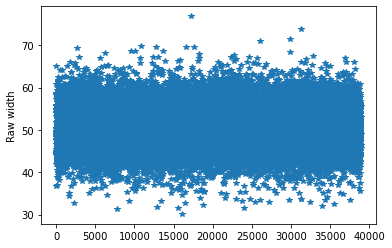

In [17]:
plt.plot(raw_width['pheno'],'*')
plt.ylabel("Raw width")

Find Ids where raw width < 30

In [25]:
to_check=np.array(raw_width[raw_width['pheno']<35]['idx'])

In [14]:
## CHECK SPHERICITY INDEX

Text(0, 0.5, 'Sphericity Index')

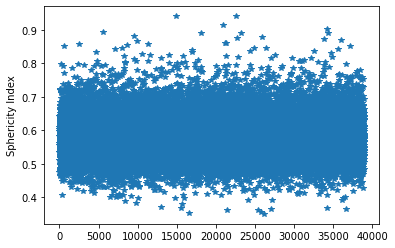

In [6]:
plt.plot(si['pheno'],'*')
plt.ylabel("Sphericity Index")

Find Ids where si

In [12]:
to_check=np.array(si[si['pheno']>0.8]['idx'])

In [13]:
to_check

array([1068123, 1314657, 1586966, 1604778, 1699405, 1912440, 2014916,
       2049896, 2065836, 2101457, 2208868, 2222293, 2260719, 2269153,
       2354840, 2453474, 2463220, 2487258, 2666834, 2805161, 2806145,
       2928197, 2945207, 3001183, 3036805, 3059677, 3179442, 3185289,
       3282713, 3327777, 3699305, 3738092, 3745611, 3752719, 3916680,
       3918364, 3945165, 3980316, 4152282, 4218417, 4345180, 4419419,
       4498823, 4561323, 4838725, 4963424, 4988898, 5017347, 5044788,
       5153833, 5217519, 5274882, 5387302, 5396580, 5436150, 5446924,
       5499688, 5504235, 5611162, 5660275, 5795856], dtype=int64)

In [ ]:
to

IDX is 1068123


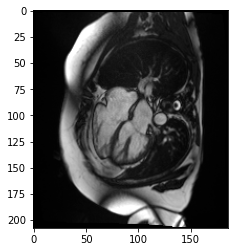

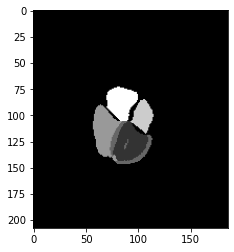

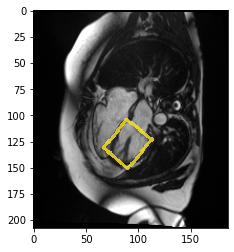



IDX is 1314657


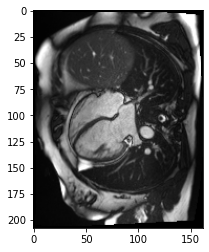

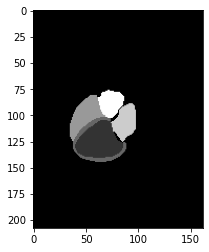

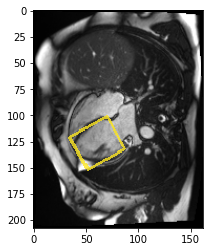



IDX is 1586966


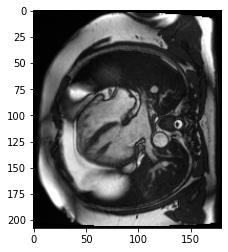

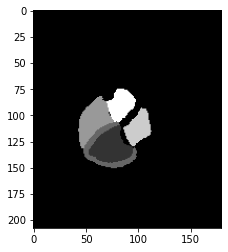

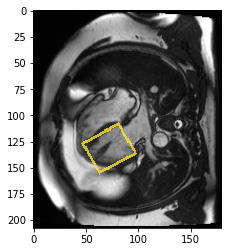



IDX is 1604778


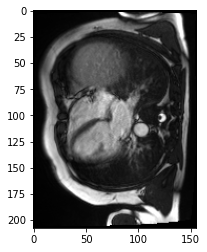

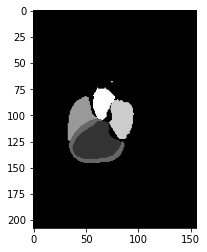

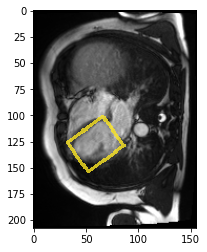



IDX is 1699405


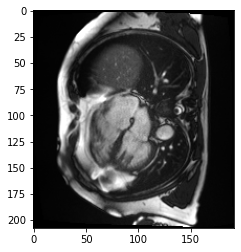

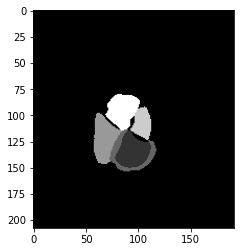

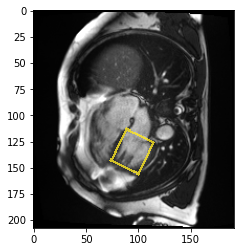



IDX is 1912440


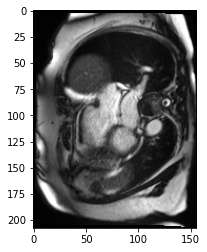

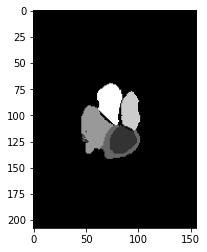

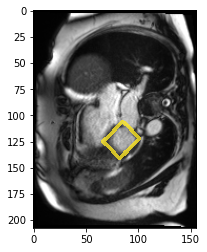



IDX is 2014916


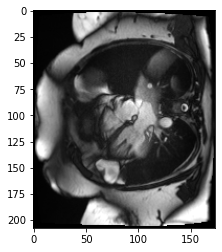

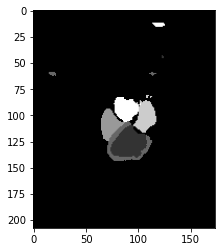

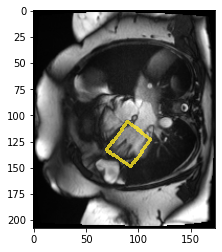



IDX is 2049896


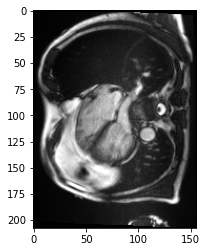

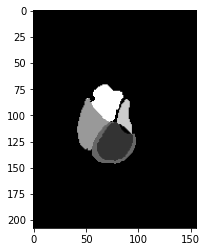

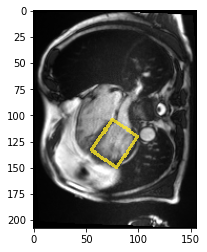



IDX is 2065836


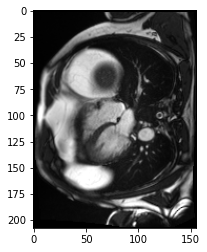

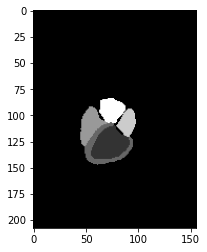

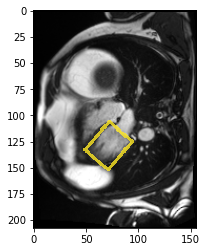



IDX is 2101457


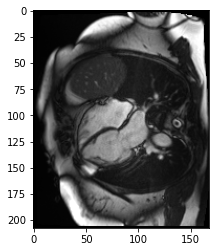

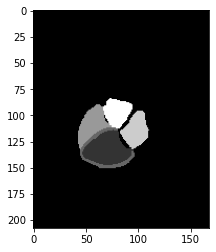

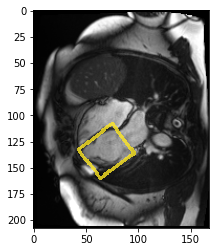



IDX is 2208868


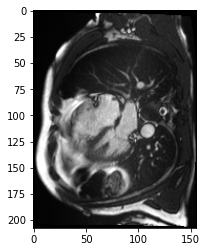

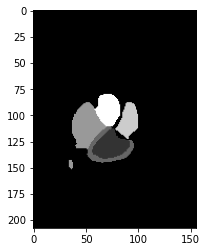

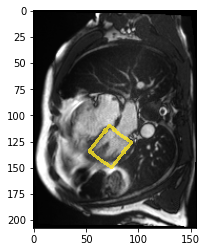



IDX is 2222293


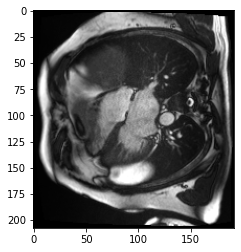

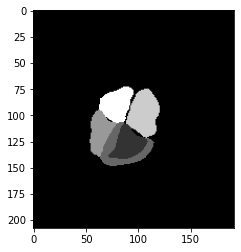

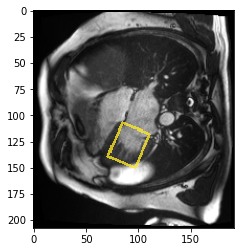



IDX is 2260719


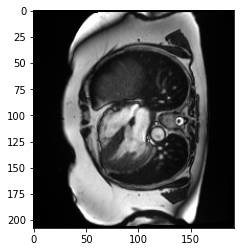

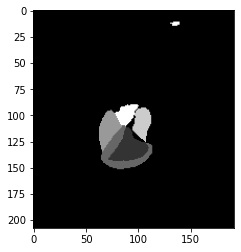

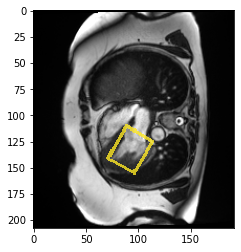



IDX is 2269153


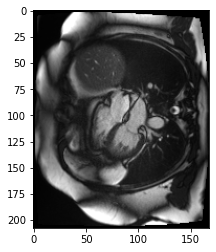

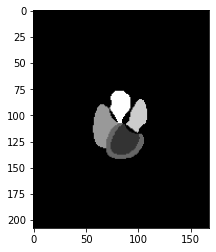

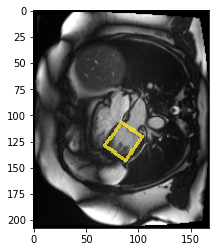



IDX is 2354840


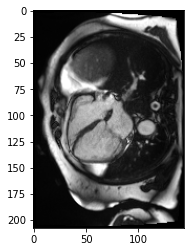

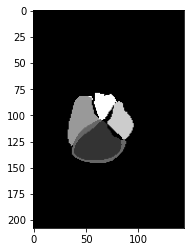

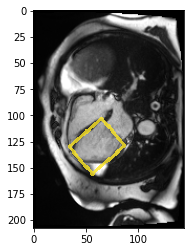



IDX is 2453474


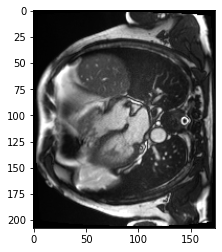

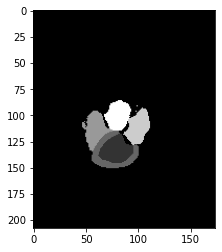

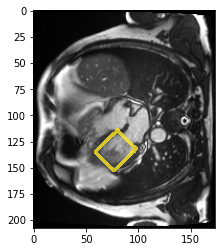



IDX is 2463220


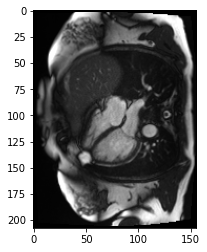

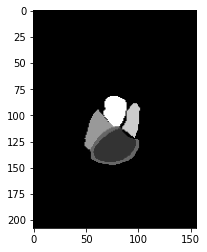

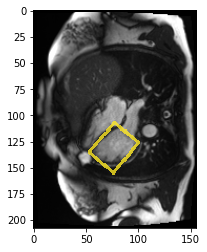



IDX is 2487258


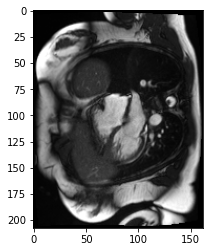

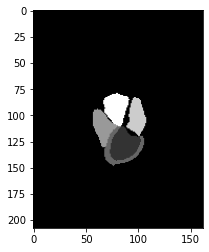

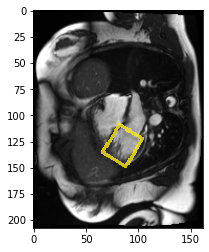



IDX is 2666834


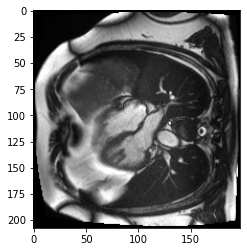

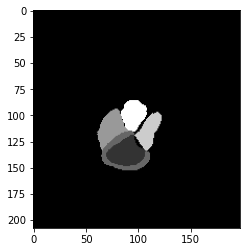

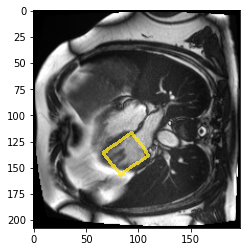



IDX is 2805161


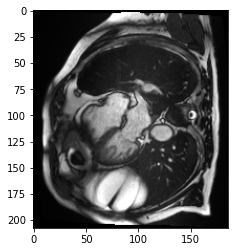

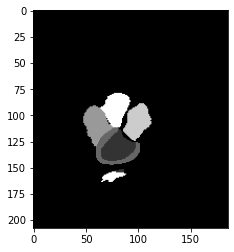

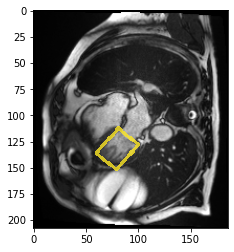



IDX is 2806145


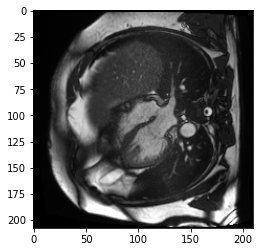

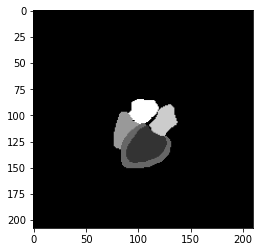

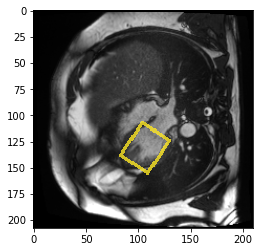



IDX is 2928197


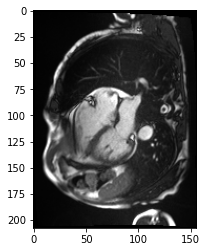

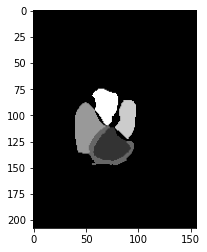

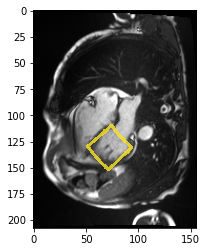



IDX is 2945207


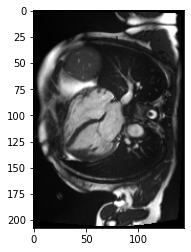

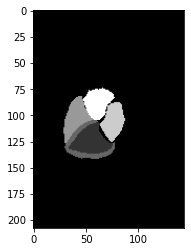

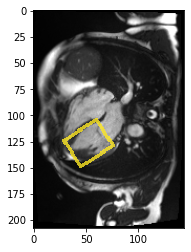



IDX is 3001183


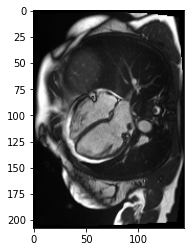

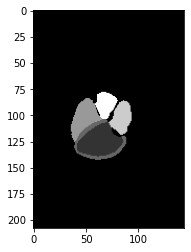

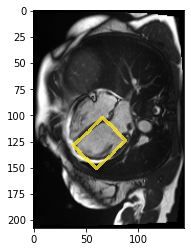



IDX is 3036805


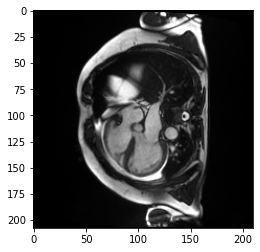

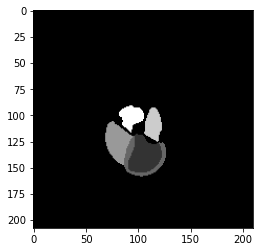

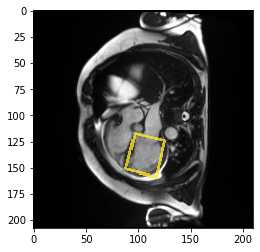



IDX is 3059677


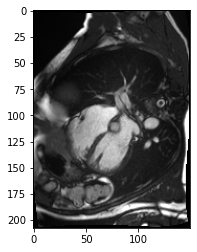

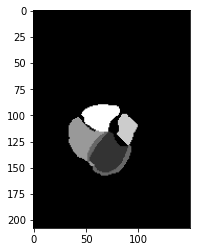

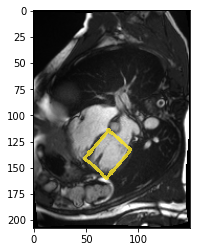



IDX is 3179442


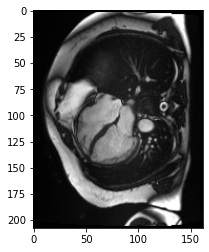

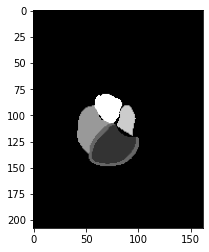

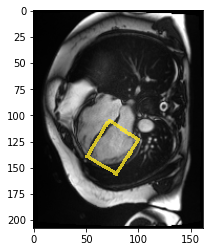



IDX is 3185289


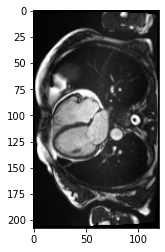

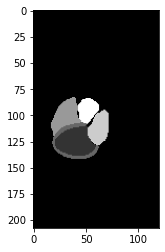

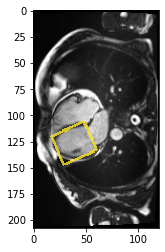



IDX is 3282713


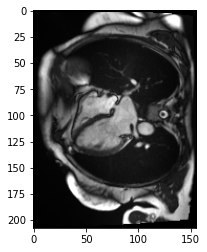

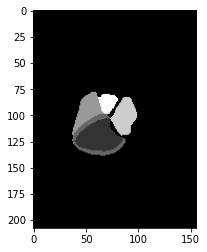

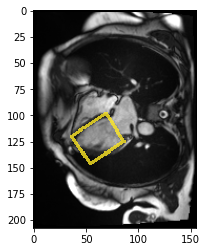



IDX is 3327777


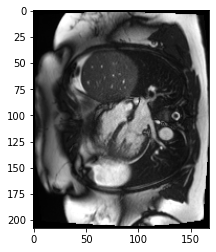

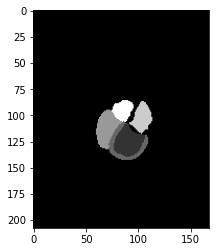

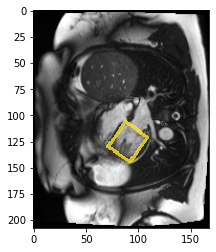



IDX is 3699305


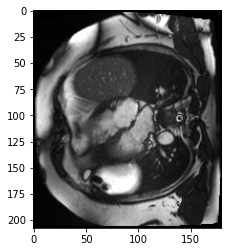

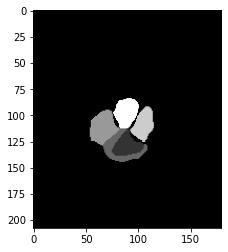

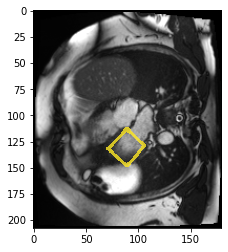



IDX is 3738092


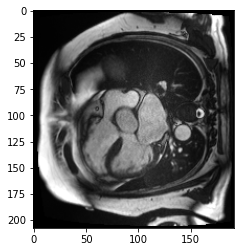

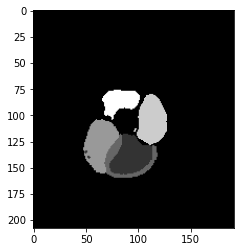

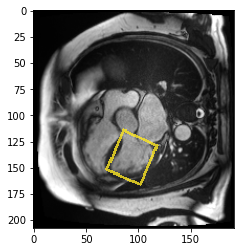



IDX is 3745611


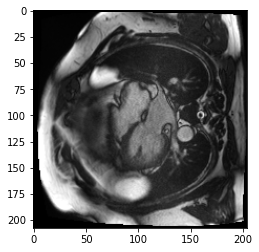

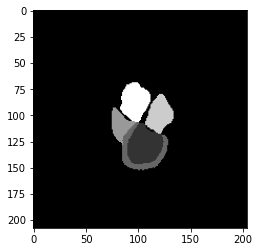

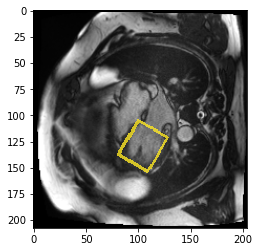



IDX is 3752719


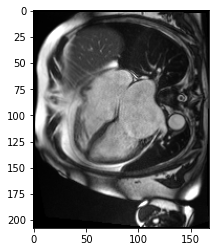

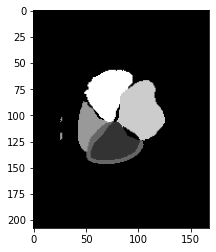

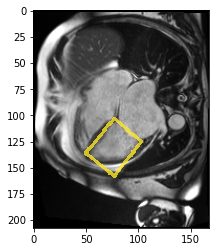



IDX is 3916680


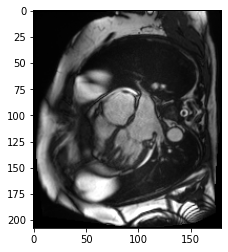

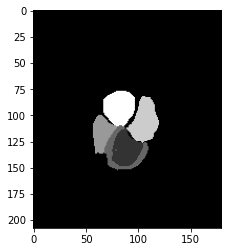

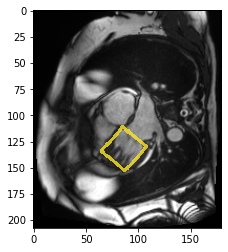



IDX is 3918364


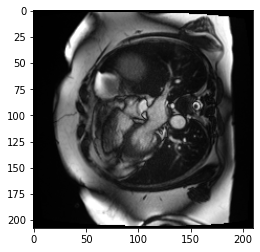

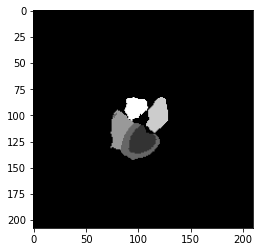

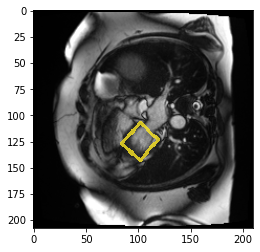



IDX is 3945165


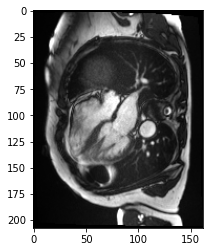

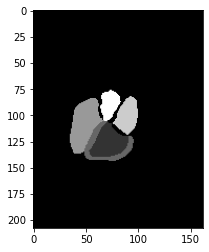

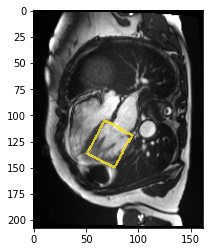



IDX is 3980316


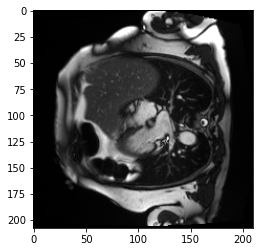

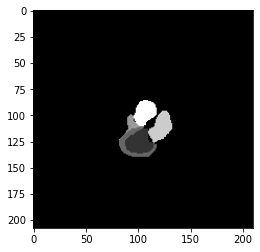

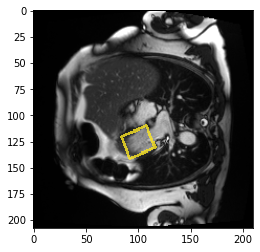



IDX is 4152282


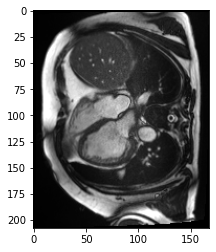

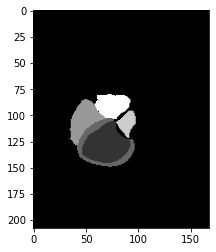

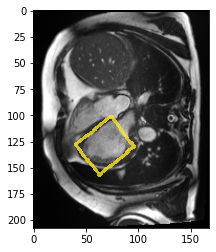



IDX is 4218417


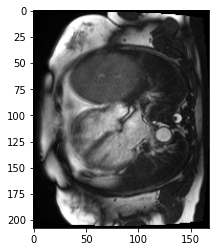

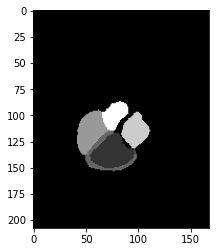

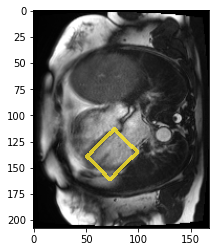



IDX is 4345180


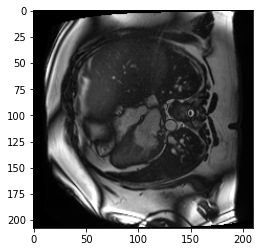

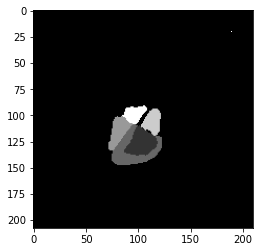

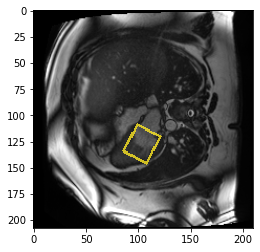



IDX is 4419419


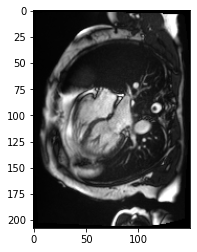

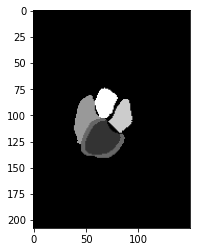

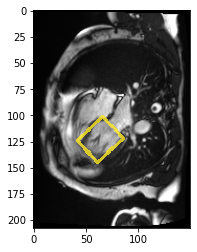



IDX is 4498823


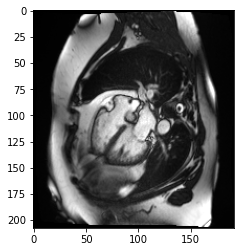

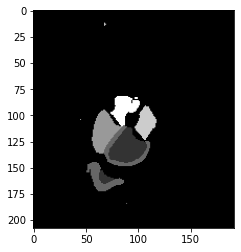

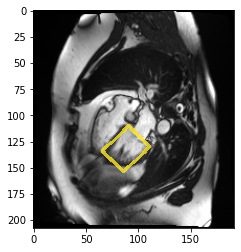



IDX is 4561323


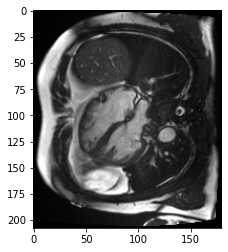

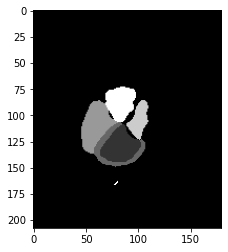

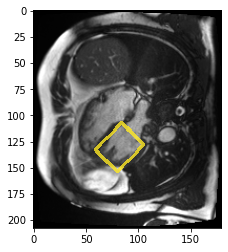



IDX is 4838725


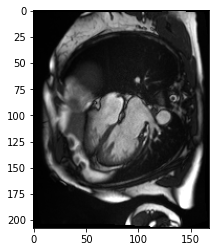

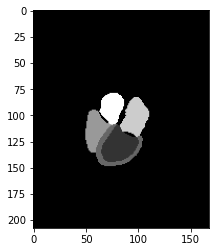

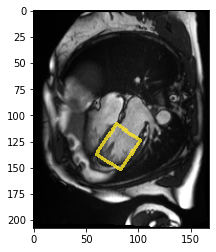



IDX is 4963424


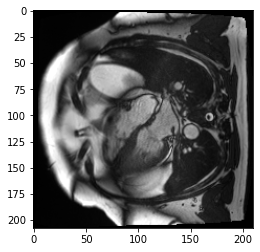

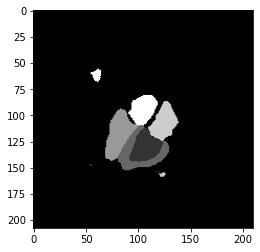

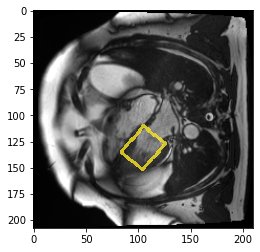



IDX is 4988898


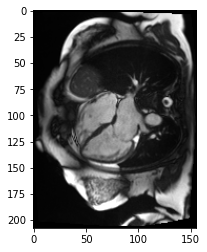

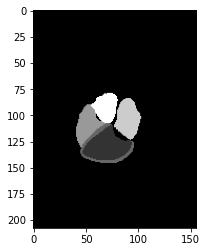

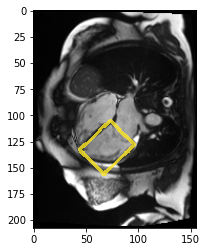



IDX is 5017347


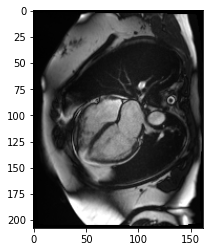

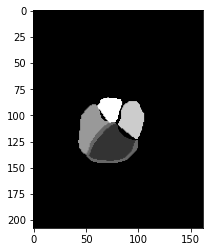

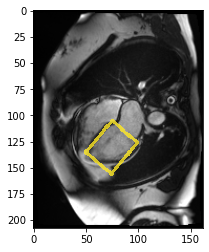



IDX is 5044788


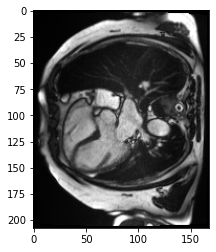

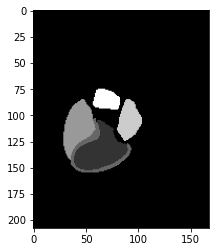

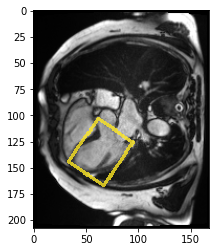



IDX is 5153833


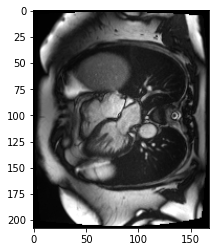

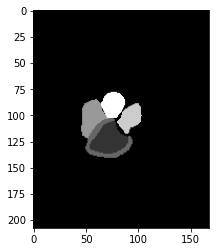

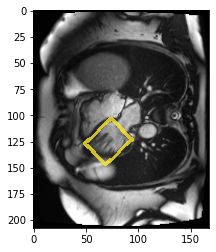



IDX is 5217519


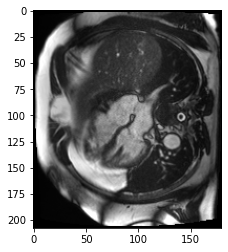

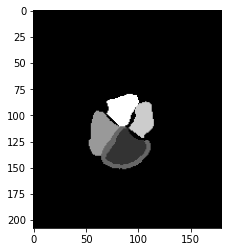

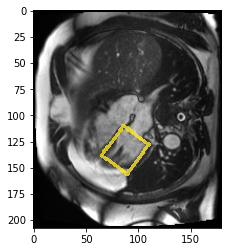



IDX is 5274882


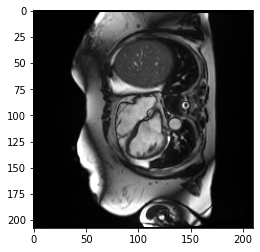

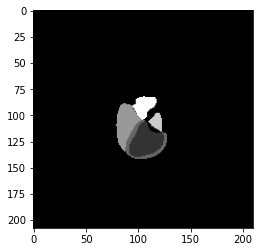

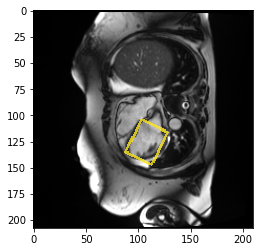



IDX is 5387302


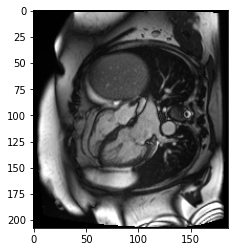

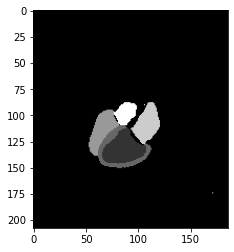

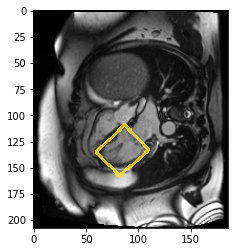



IDX is 5396580


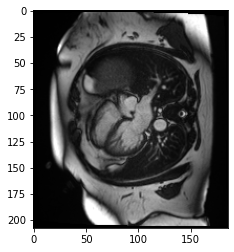

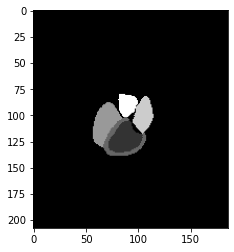

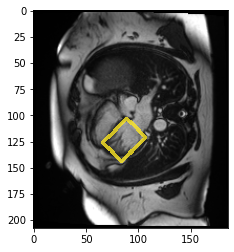



IDX is 5436150


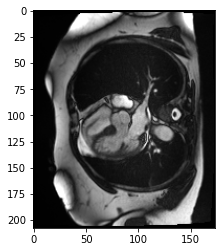

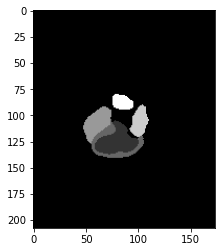

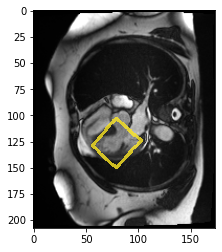



IDX is 5446924


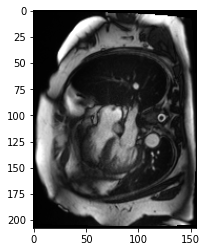

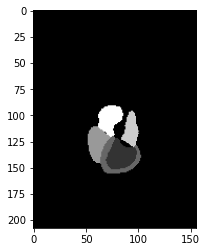

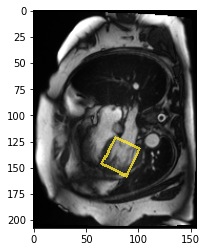



IDX is 5499688


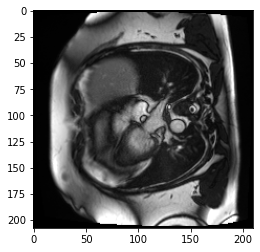

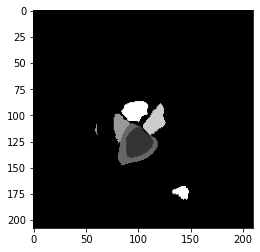

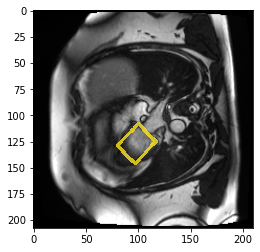



IDX is 5504235


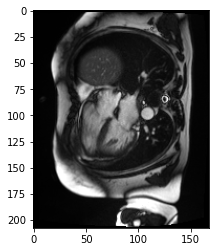

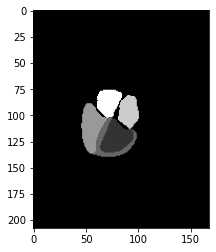

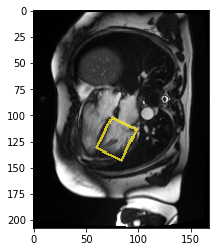



IDX is 5611162


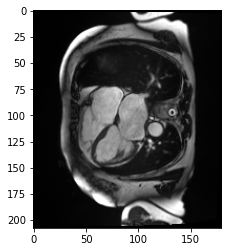

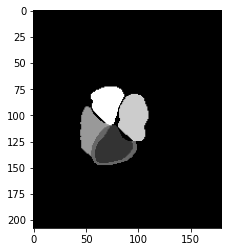

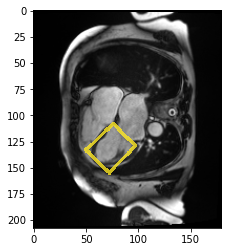



IDX is 5660275


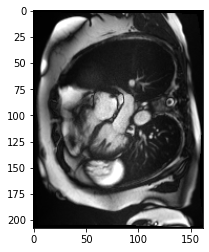

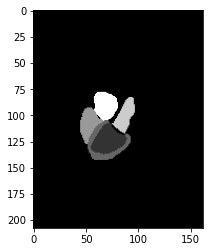

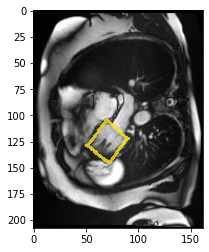



IDX is 5795856


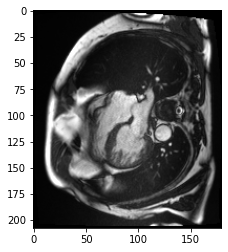

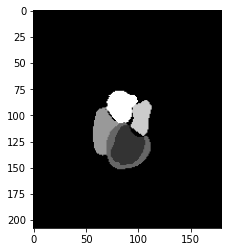

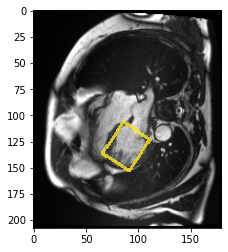

In [14]:
for idx in to_check:
    v_check(idx)

In [27]:
to_check = [1290113,3416091,4093672,5052070,5202281]

In [45]:
df = pd.read_csv("I:/UKB_DATA/main_df/ukb47615.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (354,2831,2925,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946,2947,2948,2949,2950,2957,2958,2959,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2986,2988,2989,3010,3080,3082,3083,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3099,3100,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122,3123,3124,3125,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141,3142,3143,3144,3145,3146,3147,3148,3149,3150,3151,3152,3153,3154,3156,3157,3158,3159,3160,3161,3162,3163,3164,3165,3166,3167,3168,3169,3170,3171,3172,3173,3174,3175,3176,3190,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200,3201,3202,3203,3204,3205,3206,3207,3208,3209,3210,3211,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221,3222,3223,3224,3225,3226,3227,3228,3

In [46]:
si_df = si.merge(df,left_on='idx',right_on='eid')

In [47]:
si_df

Unnamed: 0      idx     pheno      eid  36-0.0  36-1.0  36-2.0  36-3.0  \
0               0  1000158  0.512526  1000158   156.0     NaN  1041.0     NaN   
1               1  1000243  0.582123  1000243  3155.0     NaN  3782.0     NaN   
2               2  1000262  0.642401  1000262  1055.0     NaN  3159.0     NaN   
3               3  1000369  0.598390  1000369  1051.0     NaN  2818.0     NaN   
4               4  1000489  0.535714  1000489  3159.0     NaN  2818.0     NaN   
...           ...      ...       ...      ...     ...     ...     ...     ...   
38890       38892  6024127  0.584615  6024127  1050.0     NaN     NaN     NaN   
38891       38893  6024225  0.642857  6024225  1059.0     NaN   162.0     NaN   
38892       38894  6024290  0.532787  6024290  3161.0     NaN     NaN     NaN   
38893       38895  6024624  0.504608  6024624  2817.0     NaN  2818.0     NaN   
38894       38896  6024797  0.573333  6024797  3780.0  1046.0   162.0     NaN   

       37-0.0  37-1.0  ...  131414-0.0  131415-0.0  131416-0.0  131417-0.0  \
0         NaN     NaN  ...         NaN         NaN         NaN         NaN   
1         NaN     NaN  ...         NaN         NaN         NaN         NaN   
2         NaN     NaN  ...         NaN         NaN         NaN         NaN   
3         NaN     NaN  ...         NaN         NaN         NaN         NaN   
4         NaN     NaN  ...         NaN         NaN         NaN         NaN   
...       ...     ...  ...         ...         ...         ...         ...   
38890     NaN     NaN  ...         NaN         NaN         NaN         NaN   
38891     NaN     NaN  ...         NaN         NaN         NaN         NaN   
38892     NaN     NaN  ...         NaN         NaN         NaN         NaN   
38893     NaN     NaN  ...         NaN         NaN         NaN         NaN   
38894     NaN     NaN  ...         NaN         NaN  2011-01-30        40.0   

       131418-0.0  131419-0.0  131420-0.0  131421-0.0  131422-0.0  131423-0.0  
0             NaN         NaN         NaN         NaN         NaN         NaN  
1             NaN         NaN         NaN         NaN         NaN         NaN  
2             NaN         NaN         NaN         NaN         NaN         NaN  
3             NaN         NaN         NaN         NaN         NaN         NaN  
4             NaN         NaN         NaN         NaN         NaN         NaN  
...           ...         ...         ...         ...         ...         ...  
38890         NaN         NaN         NaN         NaN         NaN         NaN  
38891         NaN         NaN         NaN         NaN         NaN         NaN  
38892         NaN         NaN         NaN         NaN         NaN         NaN  
38893         NaN         NaN         NaN         NaN         NaN         NaN  
38894         NaN         NaN         NaN         NaN         NaN         NaN  

[38895 rows x 5080 columns]

In [ ]:
si_df.to_csv("I:/UKB_DATA/main_df/si_ubk47615.csv")